# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates  
- male and female life expectancy  
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.


In [31]:
import pandas as pd

df = pd.read_csv("europe_demo_cleaned.csv")


In [23]:
df.head()

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km
0,Austria,9.4,10.3,78.9,83.6,8917000.0,106.3
1,Belgium,9.9,11.0,78.6,83.1,11544000.0,378.1
2,France,10.9,9.9,79.2,85.3,67380000.0,122.7
3,Germany,9.3,11.9,78.6,83.4,83161000.0,232.6
4,Liechtenstein,9.1,8.2,80.1,83.6,38137.0,237.6


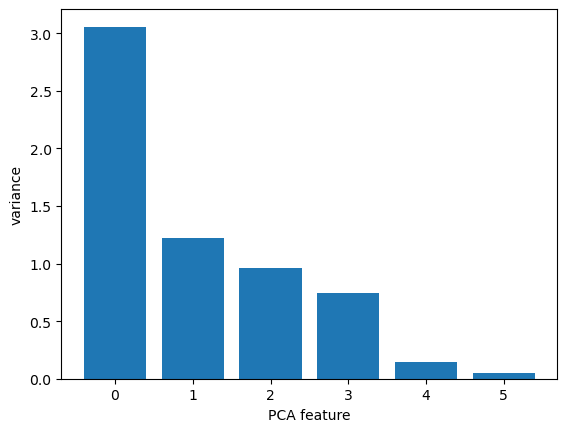

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

country_names = df['country_name']
numeric_df = df.drop(columns=['country_name'])

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)

pipeline.fit(numeric_df)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

- Use **PCA** to reduce the dimensionality of the data and support your interpretation.


In [26]:
pca = PCA(n_components=3)

pca.fit(numeric_df)

pca_features = pca.transform(numeric_df)

print(pca_features.shape)
pca_features

(36, 3)


array([[-9.83321269e+06, -5.63264706e+01,  3.47267399e+00],
       [-7.20621269e+06,  2.17126432e+02,  1.13691391e+00],
       [ 4.86297873e+07, -2.89981254e+00,  6.88218855e+00],
       [ 6.44107873e+07,  1.16978319e+02,  4.49120416e+00],
       [-1.87120757e+07,  6.93606875e+01,  4.12791624e+00],
       [-1.81197937e+07,  7.55356250e+01,  4.30842222e+00],
       [-1.30821269e+06,  2.62570256e+02,  2.57664659e+00],
       [-1.01132127e+07,  4.64133021e+01,  5.93468024e+00],
       [-9.37021269e+06, -1.17218548e+02, -6.65014107e+00],
       [-1.18162127e+07, -1.01493692e+02, -9.47885318e+00],
       [-8.05221269e+06, -2.59289510e+01, -1.20707522e+00],
       [-9.00021269e+06, -5.73558125e+01, -5.46344407e+00],
       [-1.61302127e+07, -8.92827908e+01, -9.22778284e+00],
       [ 1.91487873e+07, -2.31196691e+01, -2.66575638e+00],
       [ 5.07787306e+05, -7.53676687e+01, -7.07688420e+00],
       [ 1.25353787e+08, -6.86845565e+01, -5.49137816e+00],
       [-1.32912127e+07, -5.35536090e+01

- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram**, and analyze the outcome.

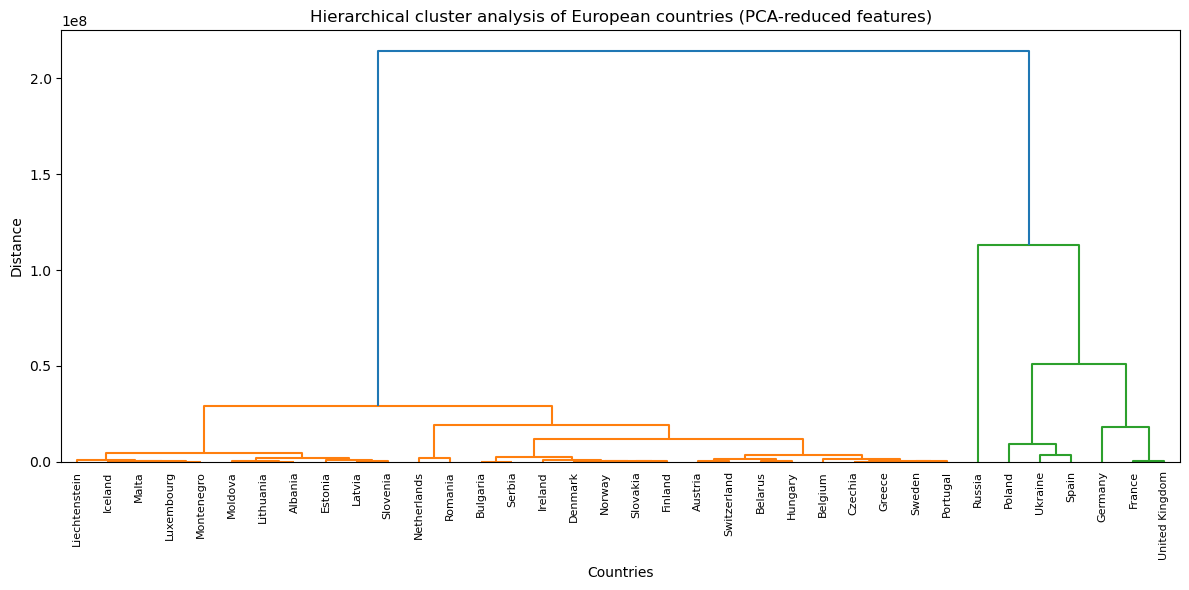

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch


linked_countries = sch.linkage(pca_features, method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(
    linked_countries,
    labels=country_names.tolist(), 
    leaf_rotation=90,
    leaf_font_size=8)

plt.title("Hierarchical cluster analysis of European countries (PCA-reduced features)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Two main branches imply that there is a difference between these two groups. The green branch includes larger, more economically or politically influential countries. The orange cluster contains countries prob. with a wider mix like smaller and mid-sized countries. 

- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.

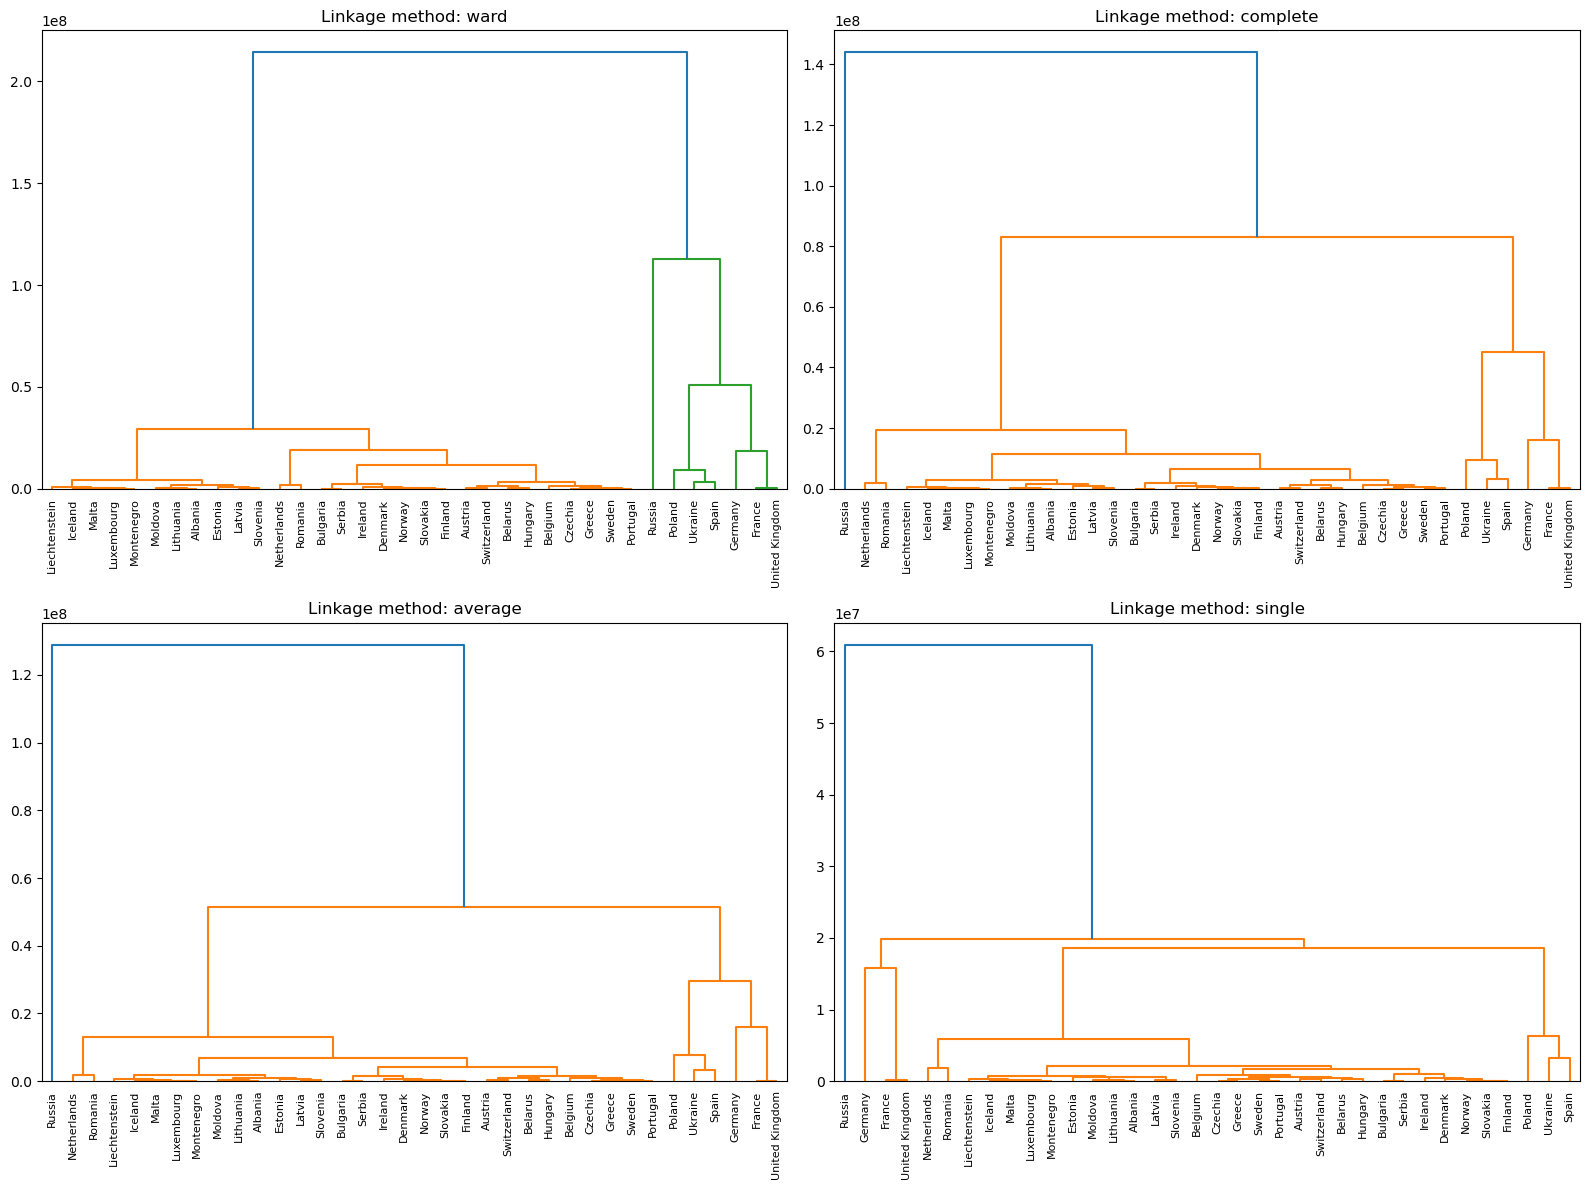

In [30]:
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(16, 12))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    linked = sch.linkage(pca_features, method=method)
    sch.dendrogram(linked, labels=country_names.tolist(), leaf_rotation=90, leaf_font_size=8)
    plt.title(f"Linkage method: {method}")

plt.tight_layout()
plt.show()

ward is the most appropriate when using PCA reduced data, since you want to minimize variance to be more effective. It's better to identify clusters that align with e.g. economic, geographic, political similarities. 

Complete linkage: tight clusters, some clusters cluster too early, bit too conservative in this context. 

Average: moderately compact clusters, smoother than complete. Good alternative for ward. 

Single: keeps similar countries together very early, chaining effect, dendrogram is flat and lacks cluster definition. 

**Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?**

Cluster 1: UK, France, Germany and Spain share large population, high GDP, similar political and economic importance etc. They merge at higher distance from others - less similar to smaller countries.

CLuster 2: Belarus, Moldova, Poland, Serbia, Albania, Romania etc. share lower GPD, econonmies are more in transition, not fully integrated into western European institution. These countries merge over a longer vertical range, suggesting moderate internal differences but overall lower similarity to western clusters.

Cluster 3: Sweden, Denmark, Finnland, Netherlands, Austria, Belgium, Switzerland, Czechia, Slovakia - stable and strong economies, politically neutral or cooperative. Clustered tightly, suggesting homogeneity in performance and indicators. 

Cluster 4: Liechtenstein, Iceland, Luxembourg, Malta, Montenegro, Estonia, Latvia, Slovenia - small populations, some extremely wealthy, emerging or niche economies. 